# 1. Introduction

## 1.1 What is Retrieval Augmented Generation (RAG)?

Retrieval Augmented Generation (RAG) is a framework that combines the power of retrieval-based methods and generation-based methods in natural language processing tasks, particularly in question answering and text generation. It was introduced to address the limitations of both approaches and achieve better performance in understanding and generating natural language text. Here's an explanation of each component in the RAG framework:

1) **`Retrieval Component`**:

    - The retrieval component involves retrieving relevant information from a large corpus of text or a knowledge base. This could be achieved using various techniques such as keyword matching, semantic search, or more sophisticated methods like dense vector retrieval (e.g., using models like Dense Retrieval). The goal is to efficiently find passages or documents that contain relevant information related to the input query or prompt.
    
2) **`Augmentation`**:

    - Augmentation refers to enriching the input data or query with additional context or information retrieved from the corpus. This can involve appending relevant passages or documents retrieved from the retrieval component to the input query or prompt. By augmenting the input with retrieved knowledge, the model has access to a broader context, which can improve its understanding and generation capabilities.

3) **`Generation Component`**:

    - The generation component involves generating a response or output based on the augmented input. This can be done using techniques such as sequence-to-sequence models, transformers, or other generative models. The model takes the augmented input, along with any additional context provided, and generates a natural language response or text that addresses the query or prompt.

4) **`Integration`**:

    - Integration refers to the seamless combination of the retrieval and generation components within the framework. This involves designing mechanisms to effectively incorporate retrieved knowledge into the generation process. For instance, retrieved passages can be used as additional input tokens or encoded into a fixed-length vector representation to be used alongside the original input during generation. The integration ensures that the generated output is informed by the relevant information retrieved from the corpus.
    
Overall, the Retrieval Augmented Generation (RAG) framework leverages the strengths of both retrieval-based and generation-based approaches to enhance natural language understanding and generation tasks. By effectively integrating retrieval and generation components and augmenting input with retrieved knowledge, RAG models are capable of producing more accurate and contextually relevant responses compared to traditional generation models.

## 1.2 How does RAG helps?

1) **`Unlimited Knowledge`**: The Retriever of RAG system can have access to external sources of information. Therefore, the LLM is not limited to its internal knowledge. The external sources can be proprietary documents and data or event the Internet.

- Comparision of **`Without RAG`** Vs. **`With RAG`**:
    - In case of without RAG, an LLM has knowledge only of the data it has been originally trained on. Also known as Parametric memory that is the information stored in the model parameters.
    - In case of with RAG, Retriever searches and fetches information that the LLM has not necessarily been trained on. This adds to the LLM memory and is passed as the context in the prompts. Also called as Non-Parametric memory that is information available outside the model parameters. The benefits of this approach are it is easy to expand to all the data sources, it is easier to update/maintain, and it is much cheaper than retraining/fine-tuning.
    
2) **`Confidence in Response`**: With the context (extra information that is retrieved, provided by the the retriever component) made available to the LLM, the confidence in LLM response is increased.

- The benefits of RAG in increasing the confidence of LLM response are as the following:
    - Context Awareness: The added information assists LLMs in generating responses that are accurate and contextually appropriate.
    - Source Citation: We get the know the sources of information which improves the transparency of the LLM responses.
    - Reduced Hallucinatios: RAG enabled LLM systems are observed to be less prone to hallucinations than the ones without RAG.
    
## 1.3 RAG Architecture

Revisit the five high level steps of an RAG enabled system:

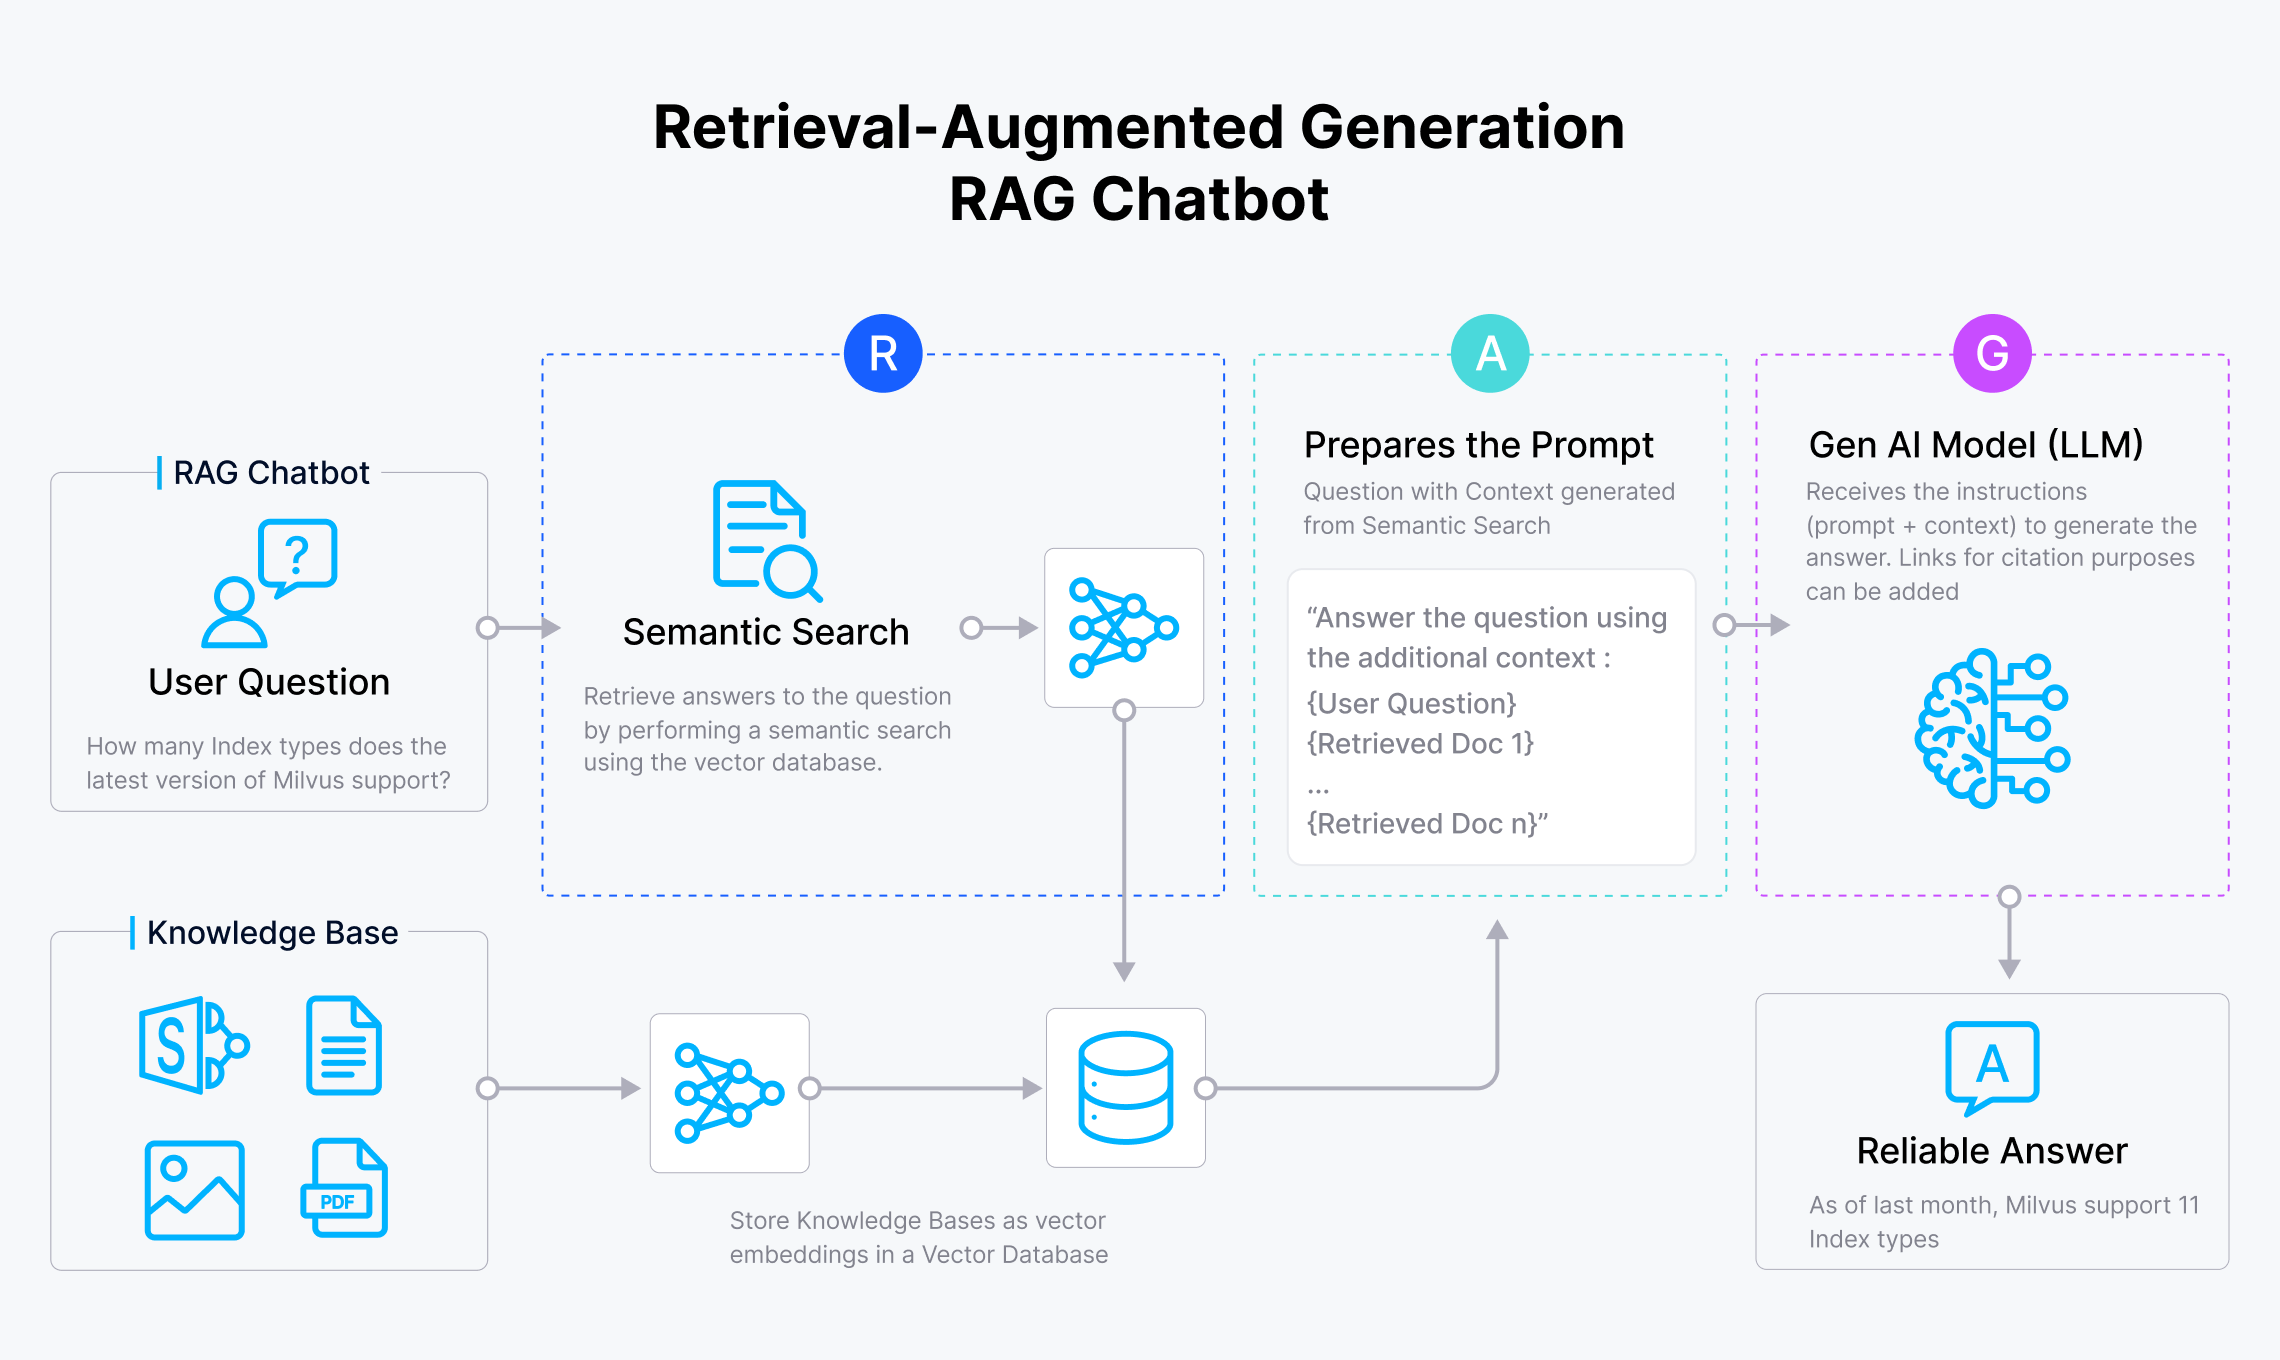

1) User writes a prompt or a query that is passed to an orchestrator
2) Orchestrator sends a search query to the retriever
3) Retriever fetches the relevant information from the knowledge sources and sends back
4) Orchestrator augments the prompt with the context and sends to the LLM
5) LLM responds with the generated text which is displayed to the user via the orchestrator

Two pipelines become important in setting up the RAG system. The first one being setting up the knowledge sources for efficient search and retrieval and the second one being the five steps of the generation.

A) **`Indexing Pipeline`**: Data for the knowledge is ingested from the source and indexed. This involves steps like splitting, creation of embeddings and storage of data.

B) **`RAG Pipeline`**: This involves the actual RAG process which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

## 1.4 Indexing Pipeline

The index pipeline creates the knowledge source for the RAG system. It is generally considered as an offline process. However, information can also be fetched in real time as well. It involves 4 primary steps:

1) **`Loading`**: This step involves extracting information from different knowledge sources and loading them into documents.

2) **`Splitting`**: This step involves splitting documents into smaller manageable chunks. Smaller chunks are easier to search and to use in LLM context windows.

3) **`Embedding`**: This step involves converting text documents into numerical vector representations. ML models are mathematical models, and therefore require numerical data.

4) **`Storing`**: This step involves storing the embedding vectors. Vector are typically stored in Vector Databases which are best suited for searching.

## 1.5 RAG Pipeline

Now that we've the knowledge base created in the Indexing Pipeline, the main generation, or the RAG pipeline will have to be setup for receiving the input and generating the output.

**`Generation Steps`**: 

1) User writes a prompt or a query that is passed to an orchestrator.
2) Orchestrator sends a search query to the retriever
3) Retriever fetches the relevant information from the knowledge sources and returns
4) Orchestrator augments the prompt with the context and sends to the LLM
5) LLM responds with the generated text which is displayed to the user via the orchestrator

## 1.6 RAG Pipeline Steps

The 3 primary steps in a RAG pipeline are:

1) **`Search & Retrieval`**: This step involves searching for the context from the source (for instance, vector database).
2) **`Augmentation`**: This step involves adding the context to the prompt depending on the use case.
3) **`Generation`**: This step involves generating the final response from an LLM.

An important consideration is how knowledge is stored and accessed. This has a bearing on the search & retrieval step.

1) **`Persistent Vector DBs`**: When a large volume of data is stored in vector databases, the retrieval and search needs to be quick. The relevance and accuracy of the search can be tested.

2) **`Temporary Vector Index`**: When the data is temporarily stored in vector indices for one time use, the accuracy and relevance of the search needs to be ascertained.

3) **`Small Data`**: Generally, when small amount of data is retrieved from pre-determined external sources, the augmentation of the data becomes more critical.

# 2. ChatBot Implementation in LangChain

## 2.1 Installing and Loading Necessary Libraries

In [1]:
!pip3 install python-dotenv openai==0.28 langchain==0.0.226 pydantic==1.10.11 --quiet
!pip3 install yt_dlp pydub pypdf chromadb==0.4.0 --quiet
!pip3 install unstructured selenium tiktoken --quiet
!pip3 install sentence_transformers===2.2.2 --quiet

In [2]:
import os
import sys
import nltk
import openai
import numpy as np
nltk.download('punkt')
sys.path.append("../..")

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv())

openai.api_key = os.environ['OPENAI_API_KEY']

import chromadb
from chromadb.config import Settings

################## Data Loaders ##################
## PDF Files Loader
from langchain.document_loaders import PyPDFLoader
## YouTube 
from langchain.document_loaders.generic import GenericLoader
from langchain.document_loaders.parsers import OpenAIWhisperParser
from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader
## URL Loader
from langchain.document_loaders import WebBaseLoader
## Text File Loader
from langchain.document_loaders import TextLoader
## Loader for loading HTML documents from a list of URLs requiring JavaScript rendering. 
from langchain.document_loaders import SeleniumURLLoader
## Loader to load/import data from Google Drive 
from langchain.document_loaders import GoogleDriveLoader

################## Document Splitting ##################
from langchain.text_splitter import (
    CharacterTextSplitter,
    RecursiveCharacterTextSplitter,
    SpacyTextSplitter,
    NLTKTextSplitter,
    MarkdownTextSplitter,
    MarkdownHeaderTextSplitter,
    TokenTextSplitter
)

################## VectorStores & Embeddings ##################
## OpenAI Embeddings
from langchain.embeddings import OpenAIEmbeddings
## ChromaDB VectorStore
from langchain.vectorstores import Chroma

################## LLMs and Retrievers ##################
## LLM
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
## 
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain.chains.query_constructor.base import AttributeInfo
## 
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain.chains import RetrievalQA, RetrievalQAWithSourcesChain
## Prompt Templates
from langchain.prompts import PromptTemplate
## Conversation Memory
from langchain.memory import ConversationBufferMemory
## ConversationalRetrievalChain
from langchain.chains import ConversationalRetrievalChain
## cosine similarity function
from sklearn.metrics.pairwise import cosine_similarity

from langchain_core.documents import Document

[nltk_data] Downloading package punkt to C:\Users\Chirag
[nltk_data]     Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 2.2 Building VectorStore and Retriever

In [3]:
# directory to store vector database
persist_directory = "docs/chroma"
# PDF Loader
loader = PyPDFLoader("Introducing MLOps How to Scale Machine Learning in the Enterprise (Mark Treveil, Nicolas Omont, Clément Stenac etc.) (z-lib.org).pdf")
documents = loader.load_and_split()

# Converting documents into chunks
recursive_character_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=150,
    length_function=len
)
chunks = recursive_character_text_splitter.split_documents(documents)

# Embedding function
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
client = chromadb.PersistentClient(path=persist_directory, settings=Settings(allow_reset=True))

# ChromaDB VectorStore
vectordb = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings,
    client=client
)

# Defining the retriever
retriever = vectordb.as_retriever(search_type="similarity", search_kwargs={"k": 3})

# Defining the memory
memory = ConversationBufferMemory(
    memory_key="chat_history", output_key='answer', return_messages=True)

# create QA chain using `langchain`, database is used as vector store retriever to find "context" (using similarity search)
qa = ConversationalRetrievalChain.from_llm(
    llm=ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo'),
    chain_type="stuff",
    retriever=retriever,
    memory=memory,
    return_generated_question=True,
    verbose=False,
)

## 2.3 Asking Question to our Bot

In [4]:
result = qa({"question": "What does streamlining the machine learning lifecycle means?"})
result['answer']

'Streamlining the machine learning lifecycle means standardizing and optimizing the management process of developing, deploying, and maintaining machine learning models. It involves creating efficient workflows, automating tasks, improving communication and collaboration between different teams involved in the process, and ensuring that the models align with business goals and expectations.'

In [9]:
result = qa({"question": "What is the difference between MLOps, AIOps, and ModelOps?" + 
             "Make sure to provide a very in-depth answer as well as comparision of each."})
print(result['answer'])

MLOps, ModelOps, and AIOps are related concepts but have distinct focuses:

1. MLOps (Machine Learning Operations): MLOps is specifically concerned with the operationalization of machine learning models. It involves the entire lifecycle of machine learning models, including development, deployment, monitoring, and maintenance. MLOps aims to streamline the process of deploying machine learning models into production efficiently and effectively.

2. ModelOps: ModelOps is a broader concept that encompasses not only machine learning models but any kind of model, including rule-based models. While MLOps focuses on the operational aspects of machine learning models, ModelOps extends this to cover the operationalization of various types of models used in data science and AI projects.

3. AIOps (Artificial Intelligence for IT Operations): AIOps is distinct from MLOps and ModelOps as it focuses on using artificial intelligence techniques to solve operational challenges in IT environments. AIOps

# 3. Component Breakdown

## 3.1 Document Loading: Streamlined Data Ingestion

Document Loaders deal with the specifics of accessing and converting data into from a variety of formats and different sources to a standardized format. The data can come from many sources like WebSites, DataBases, YouTube, arXiv etc. and these documents can come into different data types such as PDF file(s), HTML format, JSON Object(s), etc.

The whole purpose of these data loaders is to take this variety of data sources and load them into a standard document object which consists of `content` and associated `metadata`.

We'll cover some of the document loaders only that are availabe in `Langchain`.

### 3.1.1 TextLoader

The TextLoader handles plain text files.

In [10]:
## Creating a sample text file

text = """Google opens up its AI language model PaLM to challenge OpenAI and GPT-3
Google is offering developers access to one of its most advanced AI language models: PaLM.
The search giant is launching an API for PaLM alongside a number of AI enterprise tools
it says will help businesses “generate text, images, code, videos, audio, and more from
simple natural language prompts.”

PaLM is a large language model, or LLM, similar to the GPT series created by OpenAI or
Meta’s LLaMA family of models. Google first announced PaLM in April 2022. Like other LLMs,
PaLM is a flexible system that can potentially carry out all sorts of text generation and
editing tasks. You could train PaLM to be a conversational chatbot like ChatGPT, for
example, or you could use it for tasks like summarizing text or even writing code.
(It’s similar to features Google also announced today for its Workspace apps like Google
Docs and Gmail.)
"""

## Writing the above text into a .txt file
with open("my_file.txt" , "w") as file:
    file.write(text)
    
## Using the TextLoader to load the above created file
loader = TextLoader("my_file.txt")
documents = loader.load()

print(f"Number of documents in the text file: {len(documents)}\n")
print(f"Sample Output:\n\n{documents}")

Number of documents in the text file: 1

Sample Output:

[Document(page_content='Google opens up its AI language model PaLM to challenge OpenAI and GPT-3\nGoogle is offering developers access to one of its most advanced AI language models: PaLM.\nThe search giant is launching an API for PaLM alongside a number of AI enterprise tools\nit says will help businesses “generate text, images, code, videos, audio, and more from\nsimple natural language prompts.”\n\nPaLM is a large language model, or LLM, similar to the GPT series created by OpenAI or\nMeta’s LLaMA family of models. Google first announced PaLM in April 2022. Like other LLMs,\nPaLM is a flexible system that can potentially carry out all sorts of text generation and\nediting tasks. You could train PaLM to be a conversational chatbot like ChatGPT, for\nexample, or you could use it for tasks like summarizing text or even writing code.\n(It’s similar to features Google also announced today for its Workspace apps like Google\nDocs an

### 3.1.2 PyPDFLoader

The LangChain library provides two methods for loading and processing PDF files: PyPDFLoader and PDFMinerLoader. We mainly focus on the former, which is used to load PDF files into an array of documents, where each document contains the page content and metadata with the page number.

In [11]:
## Sample Code
loader = PyPDFLoader("Introducing MLOps How to Scale Machine Learning in the Enterprise (Mark Treveil, Nicolas Omont, Clément Stenac etc.) (z-lib.org).pdf")
documents = loader.load_and_split()

print(f"Number of documents in the PDF file: {len(documents)}\n")
print(f"Sample Output of 1st document:\n\n{documents[10].page_content[:500]}")

Number of documents in the PDF file: 176

Sample Output of 1st document:

Preface
We’ve reached a turning point in the story of machine learning where the technology
has moved from the realm of theory and academics and into the “real world”—that is,
businesses providing all kinds of services and products to people across the globe.
While this shift is exciting, it’s also challenging, as it combines the complexities of
machine learning models with the complexities of the modern organization.
One difficulty, as organizations move from experimenting with machine learning


### 3.1.3 SeleniumURLLoader (URL)

SeleniumURLLoader is designed for loading HTML documents from URLs that require JavaScript rendering.

In [12]:
## Sample Code
urls = [
    "https://www.youtube.com/watch?v=TFa539R09EQ&t=139s",
    "https://www.youtube.com/watch?v=6Zv6A_9urh4&t=112s"
]

loader = SeleniumURLLoader(urls=urls)
documents = loader.load()

print(f"Number of documents : {len(documents)}\n")
print(f"Output :\n\n{documents}")

Number of documents : 2

Output :

[Document(page_content="OPENASSISTANT TAKES ON CHATGPT!\n\nSearch\n\nInfo\n\nShopping\n\nWatch Later\n\nShare\n\nCopy link\n\nTap to unmute\n\n2x\n\nIf playback doesn't begin shortly, try restarting your device.\n\nUp next\n\nLiveUpcoming\n\nPlay now\n\nMachine Learning Street Talk\n\nSubscribe\n\nSubscribed\n\nYou're signed out\n\nVideos that you watch may be added to the TV's watch history and influence TV recommendations. To avoid this, cancel and sign in to YouTube on your computer.\n\nShare\n\nAn error occurred while retrieving sharing information. Please try again later.\n\n2:19\n\n2:19 / 59:51\n\nWatch full video\n\n•\n\nScroll for details\n\nNaN / NaN\n\nNaN / NaN\n\nSearch", metadata={'source': 'https://www.youtube.com/watch?v=TFa539R09EQ&t=139s'}), Document(page_content="TAJ HOUSE BOAT  6 SEC  HINDI\n\nSearch\n\nInfo\n\nShopping\n\nWatch Later\n\nShare\n\nCopy link\n\nTap to unmute\n\n2x\n\nIf playback doesn't begin shortly, try restarting y

### 3.1.4 Google Drive loader

- The LangChain Google Drive Loader efficiently imports data from Google Drive by using the GoogleDriveLoader class. It can fetch data from a list of Google Docs document IDs or a single folder ID.

- Prepare necessary credentials and tokens:

    - By default, the GoogleDriveLoader searches for the credentials.json file in ~/.credentials/credentials.json. Use the credentials_file keyword argument to modify this path.
    - The token.json file follows the same principle and will be created automatically upon the loader's first use.
    
#### To set up the credentials_file, follow these steps:

    1) Create a new Google Cloud Platform project or use an existing one by visiting the Google Cloud Console. Ensure that billing is enabled for your project.
    2) Enable the Google Drive API by navigating to its dashboard in the Google Cloud Console and clicking "Enable."
    3) Create a service account by going to the Service Accounts page in the Google Cloud Console. Follow the prompts to set up a new service account.
    4) Assign necessary roles to the service account, such as "Google Drive API - Drive File Access" and "Google Drive API - Drive Metadata Read/Write Access," depending on your needs.
    5) After creating the service account, access the "Actions" menu next to it, select "Manage keys," click "Add Key," and choose "JSON" as the key type. This generates a JSON key file and downloads it to your computer, which serves as your credentials_file.
    
- Retrieve the folder or document ID from the URL:

    - **`Folder`**: [https://drive.google.com/drive/u/0/folders/{folder_id}](https://drive.google.com/drive/u/0/folders/%7Bfolder_id%7D)
    - **`Document`**: [https://docs.google.com/document/d/{document_id}/edit](https://docs.google.com/document/d/%7Bdocument_id%7D/edit)

- Import the GoogleDriveLoader class:

In [ ]:
loader = GoogleDriveLoader(
    folder_id="your_folder_id",
    recursive=False,
)
documents = loader.load()
# - Note that currently, only Google Docs are supported.

### 3.1.5 WebBaseLoader

It loads all text from HTML webpages into a document format.

In [14]:
loader = WebBaseLoader("https://github.com/basecamp/handbook/blob/master/37signals-is-you.md")
documents = loader.load()

print(f"Number of documents : {len(documents)}\n")
print(f"Output :\n\n{documents[:50]}")

Number of documents : 1

Output :

[Document(page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nFile not found · GitHub\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSkip to content\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nToggle navigation\n\n\n\n\n\n\n\n\n\n\n          Sign in\n        \n\n\n \n\n\n\n\n\n\n\n\n\n\n\n\n\n        Product\n        \n\n\n\n\n\n\n\n\n\n\n\n\nActions\n        Automate any workflow\n      \n\n\n\n\n\n\n\nPackages\n        Host and manage packages\n      \n\n\n\n\n\n\n\nSecurity\n        Find and fix vulnerabilities\n      \n\n\n\n\n\n\n\nCodespaces\n        Instant dev environments\n      \n\n\n\n\n\n\n\nCopilot\n        Write better code with AI\n      \n\n\n\n\n\n\n\nCode review\n        Manage code changes\n      \n\n\n\n\n\n\n\nIssues\n        Plan and track work\n      \n\n\n\n\n\n\n\nDiscussions\

### 3.1.6 YouTube

In [15]:
url="https://www.youtube.com/watch?v=zjkBMFhNj_g&t=9s"
save_dir="docs/youtube/"
loader = GenericLoader(
    YoutubeAudioLoader([url],save_dir),
    OpenAIWhisperParser()
)
documents = loader.load()
document = documents[0]

print(f"Number of documents in the PDF file: {len(documents)}\n")
print(f"Sample Output of 1st document:\n\n{document}")

[youtube] Extracting URL: https://www.youtube.com/watch?v=zjkBMFhNj_g&t=9s
[youtube] zjkBMFhNj_g: Downloading webpage
[youtube] zjkBMFhNj_g: Downloading ios player API JSON
[youtube] zjkBMFhNj_g: Downloading android player API JSON
[youtube] zjkBMFhNj_g: Downloading m3u8 information
[info] zjkBMFhNj_g: Downloading 1 format(s): 140
[download] Destination: docs\youtube\[1hr Talk] Intro to Large Language Models.m4a
[download] 100% of   55.37MiB in 00:00:12 at 4.30MiB/s     
[FixupM4a] Correcting container of "docs\youtube\[1hr Talk] Intro to Large Language Models.m4a"
[ExtractAudio] Not converting audio docs\youtube\[1hr Talk] Intro to Large Language Models.m4a; file is already in target format m4a
Transcribing part 1!
Transcribing part 2!
Transcribing part 3!
Number of documents in the PDF file: 3

Sample Output of 1st document:

page_content="Hi everyone. So recently I gave a 30-minute talk on large language models, just kind of like an intro talk. Unfortunately that talk was not record

In [16]:
## Storing all the documents in the list
document_list = []
for document in documents:
    document_list.append(document.page_content)
    
## Combining all the documents into one document
document_list = " ".join(document_list)

## Writing all the component in a file
with open("IntroToLLM_AndrejKarpathy.txt", 'w') as file:
    file.write(document_list)

## 3.2 Document Splitting

Document splitting happends after we've loaded the data. Now, we are going to talk about how to split the documents into smaller chunks. Document splitting should be done in such a way that it retains the meaningful relationships between the adjacent chunks.

### 3.2.1 What are Text Splitters and Why they are useful?

- Large Language Models, while recognized for creating human-like text, can also "hallucinate" and produce seemingly plausible yet incorrect or nonsensical information. Interestingly, this tendency can be advantageous in creative tasks, as it generates a range of unique and imaginative ideas, sparking new perspectives and driving the creative process. However, this poses a challenge in situations where accuracy is critical, such as code reviews, insurance-related tasks, or research question responses.

- One approach to mitigating hallucination is to provide documents as sources of information to the LLM and ask it to generate an answer based on the knowledge extracted from the document. This can help reduce the likelihood of hallucination, and users can verify the information with the source document.

Let's discuss the pros and cons of this approach:

**Pros**:

    - Reduced hallucination: By providing a source document, the LLM is more likely to generate content based on the given information, reducing the chances of creating false or irrelevant information.
    - Increased accuracy: With a reliable source document, the LLM can generate more accurate answers, especially in use cases where accuracy is crucial.
    - Verifiable information: Users can cross-check the generated content with the source document to ensure the information is accurate and reliable.

**Cons**:

    - Limited scope: Relying on a single document may limit the scope of the generated content, as the LLM will only have access to the information provided in the document.
    - Dependence on document quality: The accuracy of the generated content heavily depends on the quality and reliability of the source document. The LLM will likely generate incorrect or misleading content if the document contains inaccurate or biased information.
    - Inability to eliminate hallucination completely: Although providing a document as a base reduces the chances of hallucination, it does not guarantee that the LLM will never generate false or irrelevant information.
    
- Addressing another challenge, LLMs have a maximum prompt size, preventing them from feeding entire documents. This makes it crucial to divide documents into smaller parts, and Text Splitters prove to be extremely useful in achieving this. Text Splitters help break down large text documents into smaller, more digestible pieces that language models can process more effectively.

- The basis of all the text splitters in Langchain involves splitting on chunks in some chunk size with some chunk overlap.

- **`Methods`**:

    - **`create_documents()`**: Create documents from a list of texts. 
    - **`split_documents()`**: Split documents.

- Using a Text Splitter can also improve vector store search results, as smaller segments might be more likely to match a query. Experimenting with different chunk sizes and overlaps can be beneficial in tailoring results to suit your specific needs.

### 3.2.2 Customizing Text Splitter

- When handling lengthy pieces of text, it's crucial to break them down into manageable chunks. This seemingly simple task can quickly become complex, as keeping semantically related text segments intact is essential. The definition of "semantically related" may vary depending on the type of text. In this article, we'll explore various strategies to achieve this.

- At a high level, text splitters follow these steps:
    
    1) Divide the text into small, semantically meaningful chunks (often sentences).
    
    2) Combine these small chunks into a larger one until a specific size is reached (determined by a particular function).
    
    3) Once the desired size is attained, separate that chunk as an individual piece of text, then start forming a new chunk with some overlap to maintain context between segments.
    
- Consequently, there are two primary dimensions to consider when customizing your text splitter:

    - The method used to split the text
    - The approach for measuring chunk size

### 3.3.3 Character Text Splitter

- This type of splitter can be used in various scenarios where you must split long text pieces into smaller, semantically meaningful chunks. For example, you might use it to split a long article into smaller chunks for easier processing or analysis. The splitter allows you to customize the chunking process along two axes - chunk size and chunk overlap - to balance the trade-offs between splitting the text into manageable pieces and preserving semantic context between chunks.

In [17]:
loader = PyPDFLoader("Introducing MLOps How to Scale Machine Learning in the Enterprise (Mark Treveil, Nicolas Omont, Clément Stenac etc.) (z-lib.org).pdf")
pages = loader.load_and_split()

- By loading the text file, we can ask more specific questions related to the subject, which helps minimize the likelihood of LLM hallucinations and ensures more accurate, context-driven responses.

In [18]:
character_text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=50)
texts = character_text_splitter.split_documents(pages)

print (f"You have {len(texts)} documents\n\n")
print(texts[0])

You have 176 documents


page_content='Mark Treveil and the Dataiku TeamIntroducing MLOps\nHow to Scale Machine Learning in the Enterprise\nBoston Farnham Sebastopol Tokyo Beijing Boston Farnham Sebastopol Tokyo Beijing' metadata={'source': 'Introducing MLOps How to Scale Machine Learning in the Enterprise (Mark Treveil, Nicolas Omont, Clément Stenac etc.) (z-lib.org).pdf', 'page': 2}


- No universal approach for chunking text will fit all scenarios - what's effective for one case might not be suitable for another. Finding the best chunk size for your project means going through a few steps. ***First, clean up your data by getting rid of anything that's not needed, like HTML tags from websites. Then, pick a few different chunk sizes to test. The best size will depend on what kind of data you're working with and the model you're using.  Finally, test out how well each size works by running some queries and comparing the results. You might need to try a few different sizes before finding the best one***. This process might take some time, but getting the best results from your project is worth it.

---
### 3.3.4 Recursive Character Text Splitter

- The Recursive Character Text Splitter is a text splitter designed to split the text into chunks based on a list of characters provided. It attempts to split text using the characters from a list in order until the resulting chunks are small enough. By default, the list of characters used for splitting is ["\n\n", "\n", " ", ""], which tries to keep paragraphs, sentences, and words together as long as possible, as they are generally the most semantically related pieces of text. This means that the class first tries to split the text into two new-line characters. If the resulting chunks are still larger than the desired chunk size, it will then try to split the output by a single new-line character, followed by a space character, and so on, until the desired chunk size is achieved.

- To use the RecursiveCharacterTextSplitter, you can create an instance of it and provide the following parameters:
    - **`chunk_size`** : The maximum size of the chunks, as measured by the length_function (default is 100).

    - **`chunk_overlap`**: The maximum overlap between chunks to maintain continuity between them (default is 20).

    - **`length_function`**: parameter is used to calculate the length of the chunks. By default, it is set to len, which counts the number of characters in a chunk. However, you can also pass a token counter or any other function that calculates the length of a chunk based on your specific requirements.
    
- Using a token counter instead of the default **`len`** function can benefit specific scenarios, such as when working with language models with token limits. For example, OpenAI's GPT-3 has a token limit of 4096 tokens per request, so you might want to count tokens instead of characters to better manage and optimize your requests.

In [19]:
recursive_character_text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=50,
    length_function=len
)
texts = recursive_character_text_splitter.split_documents(pages)

print (f"You have {len(texts)} documents\n\n")
print(texts[0])

You have 481 documents


page_content='Mark Treveil and the Dataiku TeamIntroducing MLOps\nHow to Scale Machine Learning in the Enterprise\nBoston Farnham Sebastopol Tokyo Beijing Boston Farnham Sebastopol Tokyo Beijing' metadata={'source': 'Introducing MLOps How to Scale Machine Learning in the Enterprise (Mark Treveil, Nicolas Omont, Clément Stenac etc.) (z-lib.org).pdf', 'page': 2}


- We created an instance of the **`RecursiveCharacterTextSplitter`** class with the desired parameters. The default list of characters to split by is **`["\n\n", "\n", " ", ""]`**.

- The text is first split by two new-line characters **`(\n\n)`**. Then, since the chunks are still larger than the desired chunk size (50), the class tries to split the output by a single new-line character **`(\n)`**.

- In this example, the text is loaded from a file, and the RecursiveCharacterTextSplitter is used to split it into chunks with a maximum size of 50 characters and an overlap of 10 characters. The output will be a list of documents containing the split text.

- To use a token counter, you can create a custom function that calculates the number of tokens in a given text and pass it as the **`length_function`** parameter. This will ensure that your text splitter calculates the length of chunks based on the number of tokens instead of the number of characters.

### 3.3.5 NLTK Text Splitter

- The **`NLTKTextSplitter`** in LangChain is an implementation of a text splitter that uses the Natural Language Toolkit (NLTK) library to split text based on tokenizers. The goal is to split long texts into smaller chunks without breaking the structure of sentences and paragraphs.

> If it is your first time using this package, it is required to install the NLTK library using **`pip install -q nltk`** and run the following Python code to download the packages that LangChain needs.
import nltk; nltk.download(’punkt’);`

In [20]:
!echo "Helllo, my name is Ala\n Hello again\n\ntesting newline." > LLM.txt

# Load a long document
with open('LLM.txt', encoding= 'unicode_escape') as f:
    sample_text = f.read()

from langchain.text_splitter import NLTKTextSplitter
text_splitter = NLTKTextSplitter(chunk_size=500)


texts = text_splitter.split_text(sample_text)
print(texts)

['"Helllo, my name is Ala\n Hello again\n\ntesting newline."']


### 3.3.6 SpacyTextSplitter

- The **`SpacyTextSplitter`** helps split large text documents into smaller chunks based on a specified size. This is useful for better management of large text inputs. It's important to note that the SpacyTextSplitter is an alternative to NLTK-based sentence splitting. You can create a **`SpacyTextSplitter`** object by specifying the **`chunk_size`** parameter, measured by a length function passed to it, which defaults to the number of characters.

In [21]:
# !python -m spacy download en_core_web_sm

In [22]:
# Load a long document
with open('LLM.txt', encoding= 'unicode_escape') as f:
    sample_text = f.read()

# Instantiate the SpacyTextSplitter with the desired chunk size
text_splitter = SpacyTextSplitter(chunk_size=500, chunk_overlap=20)

# Split the text using SpacyTextSplitter
texts = text_splitter.split_text(sample_text)

# Print the first chunk
print(texts)

['"Helllo, my name is Ala\n Hello again\n\ntesting newline."']


### 3.3.7 MarkdownTextSplitter

- The **`MarkdownTextSplitter`** is designed to split text written using Markdown languages like headers, code blocks, or dividers. It is implemented as a simple subclass of **`RecursiveCharacterSplitter`** with Markdown-specific separators. By default, these separators are determined by the Markdown syntax, but they can be customized by providing a list of characters during the initialization of the MarkdownTextSplitter instance. The chunk size, which is initially set to the number of characters, is measured by the length function passed in. To customize the chunk size, provide an integer value when initializing an instance.

In [23]:
markdown_text = """
#

# Welcome to My Blog!

## Introduction
Hello everyone! My name is **Chirag Sharma** and I am a customer support agent. 
I am an aspiring Data Scientist and I specialize in Python, Machine Learning, SQL.

Here's a list of my favorite programming languages:

1. Python
2. SQL
3. HTML

You can check out some of my projects on [GitHub](https://github.com).

## About this Blog
In this blog, I will share my journey as an aspiring Data Scientist. 
I'll post tutorials, my thoughts on the latest technology trends, and occasional book reviews.

Here's a small piece of Python code to say hello:

\``` python
def say_hello(name):
    print(f"Hello, {name}!")

say_hello("Chirag")
\```

Stay tuned for more updates!

## Contact Me
Feel free to reach out to me on [Gmail](https://chirag.sharma0378@gmail.com).

"""
markdown_splitter = MarkdownTextSplitter(chunk_size=100, chunk_overlap=0)
documents = markdown_splitter.create_documents([markdown_text])
print(documents)

[Document(page_content='#\n\n# Welcome to My Blog!', metadata={}), Document(page_content='## Introduction\nHello everyone! My name is **Chirag Sharma** and I am a customer support agent.', metadata={}), Document(page_content='I am an aspiring Data Scientist and I specialize in Python, Machine Learning, SQL.', metadata={}), Document(page_content="Here's a list of my favorite programming languages:\n\n1. Python\n2. SQL\n3. HTML", metadata={}), Document(page_content='You can check out some of my projects on [GitHub](https://github.com).', metadata={}), Document(page_content='## About this Blog\nIn this blog, I will share my journey as an aspiring Data Scientist.', metadata={}), Document(page_content="I'll post tutorials, my thoughts on the latest technology trends, and occasional book reviews.", metadata={}), Document(page_content="Here's a small piece of Python code to say hello:", metadata={}), Document(page_content='\\``` python\ndef say_hello(name):\n    print(f"Hello, {name}!")\n\nsa

- The MarkdownTextSplitter offers a practical solution for dividing text while preserving the structure and meaning provided by Markdown formatting. By recognizing the Markdown syntax (e.g., headings, lists, and code blocks), you can intelligently divide the content based on its structure and hierarchy, resulting in more semantically coherent chunks. This splitter is especially valuable when managing extensive Markdown documents.

### 3.3.7 TokenTextSplitter

- The main advantage of using **`TokenTextSplitter`** over other text splitters, like **`CharacterTextSplitter`**, is that it respects the token boundaries, ensuring that the chunks do not split tokens in the middle. This can be particularly helpful in maintaining the semantic integrity of the text when working with language models and embeddings.

- This type of splitter breaks down raw text strings into smaller pieces by initially converting the text into BPE (Byte Pair Encoding) tokens, and subsequently dividing these tokens into chunks. It then reassembles the tokens within each chunk back into text. The **`tiktoken`** python package is required for using this class. **`(pip install -q tiktoken)`**

In [24]:
# Load a long document
with open('LLM.txt', encoding= 'unicode_escape') as f:
    sample_text = f.read()

# Initialize the TokenTextSplitter with desired chunk size and overlap
text_splitter = TokenTextSplitter(chunk_size=100, chunk_overlap=50)

# Split into smaller chunks
texts = text_splitter.split_text(sample_text)
print(texts[0])

"Helllo, my name is Ala
 Hello again

testing newline." 



- The chunk_size parameter sets the maximum number of BPE tokens in each chunk, while chunk_overlap defines the number of overlapping tokens between adjacent chunks. By modifying these parameters, you can fine-tune the granularity of the text chunks.

- One potential drawback of using TokenTextSplitter is that it may require additional computation when converting text to BPE tokens and back. If you need a faster and simpler text-splitting method, you might consider using CharacterTextSplitter, which directly splits the text based on character count, offering a more straightforward approach to text segmentation.

### 3.3.8 MarkdownHeaderTextSplitter

Chunking aims to keep text with common context together (Context aware splitting).

A text splitting often uses sentences or other delimiters to keep related text together but many documents (such as Markdown) have structure (headers) that can be explicitly used in splitting.

We can use `MarkdownHeaderTextSplitter` to preserve header metadata in our chunks, as show below.

In [25]:
markdown_document = """# Title\n\n \
## Chapter 1\n\n \
Hi this is Jim\n\n Hi this is Joe\n\n \
### Section \n\n \
Hi this is Lance \n\n 
## Chapter 2\n\n \
Hi this is Molly"""

headers_to_split_on = [
    ("#", "Header 1"),
    ("##", "Header 2"),
    ("###", "Header 3"),
]

markdown_splitter = MarkdownHeaderTextSplitter(
    headers_to_split_on=headers_to_split_on
)
md_header_splits = markdown_splitter.split_text(markdown_document)
print(md_header_splits[0])

page_content='Hi this is Jim  \nHi this is Joe' metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1'}


In [26]:
md_header_splits[1]

Document(page_content='Hi this is Lance', metadata={'Header 1': 'Title', 'Header 2': 'Chapter 1', 'Header 3': 'Section'})

### 3.3.8 RECAP:

Text splitters are essential for managing long text, improving language model processing efficiency, and enhancing vector store search results. Customizing text splitters involves selecting the splitting method and measuring chunk size. 

CharacterTextSplitter is an example that helps balance manageable pieces and semantic context preservation. Experimenting with different chunk sizes and overlaps tailor the results for specific use cases.

RecursiveCharacterTextSplitter focuses on preserving semantic relationships while offering customizable chunk sizes and overlaps. 

NLTKTextSplitter utilizes the Natural Language Toolkit library for more accurate text segmentation. SpacyTextSplitter leverages the popular SpaCy library to split texts based on linguistic features. MarkdownTextSplitter is tailored for Markdown-formatted texts, ensuring content is split meaningfully according to the syntax. Lastly, TokenTextSplitter employs BPE tokens for splitting, offering a fine-grained approach to text segmentation.

Selecting the appropriate text splitter depends on the specific requirements and nature of the text you are working with, ensuring optimal results for your text processing tasks.

## 4.1 VectorStores and Embeddings

We've now got our documents split up into small & sematically meaningful chunks, and we then put these chunks into an index whereby we can easily retrieve them when a new query comes to answer questions. To achieve that we utilize VectorStores and Embeddings. 

### 4.1.1 Introduction to the World of Embeddings

- Vector embeddings are among the most intriguing and beneficial aspects of machine learning, playing a pivotal role in many natural language processing, recommendation, and search algorithms. If you've interacted with recommendation engines, voice assistants, or language translators, you've engaged with systems that utilize embeddings.

- **Embeddings** are dense vector representations of data that encapsulate semantic information, making them suitable for various machine-learning tasks such as clustering, recommendation, and classification. They transform human-perceived semantic similarity into closeness in vector space and can be generated for different data types, including text, images, and audio.

- For text data, models like the GPT family of models and Llama are employed to create vector embeddings for words, sentences, or paragraphs. In the case of images, convolutional neural networks (CNNs) such as VGG and Inception can generate embeddings. Audio recordings can be converted into vectors using image embedding techniques applied to visual representations of audio frequencies, like spectrograms. Deep neural networks are commonly employed to train models that convert objects into vectors. The resulting embeddings are typically high-dimensional and dense.

- Embeddings are extensively used in similarity search applications, such as KNN and ANN, which require calculating distances between vectors to determine similarity. Nearest neighbor search can be employed for tasks like de-duplication, recommendations, anomaly detection, and reverse image search.

### 4.1.2 Similarity search and vector embeddings 

- OpenAI offers a powerful language model called GPT-3, which can be used for various tasks, such as generating embeddings and performing similarity searches. In this example, we'll use the OpenAI API to generate embeddings for a set of documents and then perform a similarity search using cosine similarity.

- First, let's install the required packages with the following command: pip install langchain==0.0.208 deeplake openai tiktoken scikit-learn.

- Next, create an API key from the OpenAI website and set it as an environment variable:
    
- Let's generate embeddings for our documents and perform a similarity search:

In [19]:
## Defining the documents
documents = [
    "The cat is on the mat.",
    "There is a dog sitting on the couch.",
    "The dog is in the yard.",
    "The whale is blue in color."
]
## Initializing the embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
## Generate embeddings
document_embeddings = embeddings.embed_documents(documents)
## Perform a similarity search for a given query
query = "The cat is walking nearby the store."
query_embedding = embeddings.embed_query(query)
## Calculate simialarity scores
similarity_scores = cosine_similarity([query_embedding], document_embeddings)[0]
## Find the most similar documents
most_similar_index = np.argmax(similarity_scores)
most_similar_document = documents[most_similar_index]

print(f"Most similar document to the query: {query}")
print(most_similar_document)

Most similar document to the query: The cat is walking nearby the store.
The cat is on the mat.


- We initialize the OpenAI API client by setting the OpenAI API key. This allows us to use OpenAI's services for generating embeddings.

- We then define a list of documents as strings. These documents are the text data we want to analyze for semantic similarity.

- In order to perform this analysis, we need to convert our documents into a format that our similarity computation algorithm can understand. This is where **`OpenAIEmbeddings`** class comes in. We use it to generate embeddings for each document, transforming them into vectors that represent their semantic content.

- Similarly, we also transform our query string into an embedding. The query string is the text we want to find the most similar document too.

- With our documents and query now in the form of embeddings, we compute the cosine similarity between the query embedding and each document embedding. The cosine similarity is a metric used to determine how similar two vectors are. In our case, it gives us a list of similarity scores for our query against each document.

- With our similarity scores in hand, we then identify the document most similar to our query. We do this by finding the index of the highest similarity score and retrieving the corresponding document from our list of documents.

- **Embedding vectors** positioned near each other are regarded as similar. At times, they are directly applied to display related items in online shops. In other instances, they are incorporated into various models to share insights across akin items rather than considering them as entirely distinct entities. This renders embeddings effective in representing aspects like web browsing patterns, textual data, and e-commerce transactions for subsequent model applications.

### 4.1.3 Embedding Models

- **`Embedding models`** are a type of machine learning model that convert discrete data into continuous vectors. In the context of natural language processing, these discrete data points can be words, sentences, or even entire documents. The generated vectors, also known as embeddings, are designed to capture the semantic meaning of the original data.

- For instance, words that are semantically similar (e.g., 'cat' and 'kitten') would have similar embeddings. These embeddings are dense, which means that they use many dimensions (often hundreds) to capture nuances in meaning.

- The primary benefit of embeddings is that they allow us to use mathematical operations to reason about semantic meaning. For example, we can calculate the cosine similarity between two embeddings to assess how semantically similar the corresponding words or documents are.

## 5.1 Retrieval

Retriever is the system that is responsible for accurately fetching the correct snippet of information that is used in responding to the user query. Retrievers accept a **`Query`** as an input and return a list of **`Documents`** as an output.

### 5.1.1 Some Popular Retrieval Methods

1) **`Similarity Search`**: This method works by calculating the distance between the embedding vectors of the input and the documents.

In [20]:
## Loading the texts and splitting them into chunks
loader = TextLoader("IntroToLLM_AndrejKarpathy.txt")
documents = loader.load()
## Split it into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
docs = text_splitter.split_documents(documents)
## Create the embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
## Load it in ChromaDB
db = Chroma.from_documents(docs, embedding=embeddings)
## Input Query
query = "What did Andrej Karpathy say about LLM operating system?"
docs = db.similarity_search(query)
## Printing the results
print(docs[0].page_content)

that I've shown you, I'm just tying it all together. I don't think it's accurate to think of large language models as a chatbot or like some kind of a word generator. I think it's a lot more correct to think about it as the kernel process of an emerging operating system. Basically, this process is coordinating a lot of resources, be they memory or computational tools for problem-solving. So let's think through based on everything I've shown you, what an LLM might look like in a few years. It can read and generate text. It has a lot more knowledge than any single human about all the subjects. It can browse the Internet or reference local files through retrieval augmented generation. It can use existing software infrastructure like Calculator, Python, et cetera. It can see and generate images and videos. It can hear and speak and generate music. It can think for a long time using System 2. It can maybe self-improve in some narrow domains that have a reward function available. Maybe it


2) **`Maximal Margincal Relevance`**: This method addresses redundancy in retrieval. This considers the relevance of each document only in terms of how much new information it brings given the previous results. MMR tries to reduce the redundancy of results while at the same time maintaining query relevance of results for already ranked documents.

    - fetch_k = Number of documents in the initial retrieval
    - k = final number of reranked documents to output

In [21]:
## Loading the texts and splitting them into chunks
loader = TextLoader("IntroToLLM_AndrejKarpathy.txt")
documents = loader.load()
## Split it into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
docs = text_splitter.split_documents(documents)
## Create the embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
## Load it in ChromaDB
db = Chroma.from_documents(docs, embedding=embeddings)
## Input Query
query = "What did Andrej Karpathy say about LLM operating system?"
docs = db.max_marginal_relevance_search(query, k=2, fetch_k=10)
## Printing the results
for i, doc in enumerate(docs):
    print(f"{i + 1}.", doc.page_content, "\n")

1. that I've shown you, I'm just tying it all together. I don't think it's accurate to think of large language models as a chatbot or like some kind of a word generator. I think it's a lot more correct to think about it as the kernel process of an emerging operating system. Basically, this process is coordinating a lot of resources, be they memory or computational tools for problem-solving. So let's think through based on everything I've shown you, what an LLM might look like in a few years. It can read and generate text. It has a lot more knowledge than any single human about all the subjects. It can browse the Internet or reference local files through retrieval augmented generation. It can use existing software infrastructure like Calculator, Python, et cetera. It can see and generate images and videos. It can hear and speak and generate music. It can think for a long time using System 2. It can maybe self-improve in some narrow domains that have a reward function available. Maybe it

3) **`Contextual compression`**: Sometimes, relevant info is hidden in long documents with a lot of extra stuff. Contextual Compression helps with this by squeezing down the documents to only the important parts that match your search.

**What occurred behind the scenes?**

Initially, we employed a so-called "stuff chain" (refer to CombineDocuments Chains). Stuffing is one way to supply information to the LLM. Using this technique, we "stuff" all the information into the LLM's prompt. However, this method is only effective with shorter documents, as most LLMs have a context length limit.

Additionally, a similarity search is conducted using the embeddings to identify matching documents to be used as context for the LLM. Although it might not seem particularly useful with just one document, we are effectively working with multiple documents since we "chunked" our text. Preselecting the most suitable documents based on semantic similarity enables us to provide the model with meaningful knowledge through the prompt while remaining within the allowed context size.

So, in this exploration, we have discovered the significant role that indexes and retrievers play in improving the performance of Large Language Models when handling document-based data. 

The system becomes more efficient in finding and presenting relevant information by converting documents and user queries into numerical vectors (embeddings) and storing them in specialized databases like Deep Lake, which serves as our vector store database.

The retriever's ability to identify documents that are closely related to a user's query in the embedding space demonstrates the effectiveness of this approach in enhancing the overall language understanding capabilities of LLMs.

**A Potential Problem**

`This method has a downside:` you might not know how to get the right documents later when storing data. In the Q&A example, we cut the text into equal parts, causing both useful and useless text to show up when a user asks a question.

`Including unrelated information in the LLM prompt is detrimental because:` It can divert the LLM's focus from pertinent details. It occupies valuable space that could be utilized for more relevant information.

**Possible Solution**

A DocumentCompressor abstraction has been introduced to address this issue, allowing compress_documents on the retrieved documents.

***`The ContextualCompressionRetriever is a wrapper around another retriever in LangChain. It takes a base retriever and a DocumentCompressor and automatically compresses the retrieved documents from the base retriever. This means that only the most relevant parts of the retrieved documents are returned, given a specific query.`***

***`A popular compressor choice is the LLMChainExtractor, which uses an LLMChain to extract only the statements relevant to the query from the documents. To improve the retrieval process, a ContextualCompressionRetriever is used, wrapping the base retriever with an LLMChainExtractor compressor. The LLMChainExtractor compressor iterates over the initially returned documents and extracts only the content relevant to the query.`***

Here's an example of how to use ContextualCompressionRetriever with LLMChainExtractor:

In [22]:
## Loading the texts and splitting them into chunks
loader = TextLoader("IntroToLLM_AndrejKarpathy.txt")
documents = loader.load()
## Split it into chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=200
)
docs = text_splitter.split_documents(documents)
## Create the embeddings
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
## Load it in ChromaDB
db = Chroma.from_documents(docs, embedding=embeddings)
## Input Query
query = "What did Andrej Karpathy say about LLM operating system?"
# create GPT3 wrapper
llm = OpenAI(model="gpt-3.5-turbo-instruct", temperature=0)
# create compressor for the retriever
compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=db.as_retriever()
)
# retrieving compressed documents
retrieved_docs = compression_retriever.get_relevant_documents(query)
print(retrieved_docs[0].page_content)

C:\Users\Chirag Sharma\AppData\Local\Programs\Python\Python310\lib\site-packages\langchain\chains\llm.py:275: UserWarning: The predict_and_parse method is deprecated, instead pass an output parser directly to LLMChain.
  warnings.warn(


It's a lot more correct to think about it as the kernel process of an emerging operating system.


4) **`Self Query`**: A self-querying retriever is a system that can ask itself questions. When you give it a question in normal language, it uses a special process to turn that question into a structured query. Then, it uses this structured query to search through its stored information. This way, it doesn't just compare your question with the documents. It also looks for specific details in the documents based on your question, making the search more efficient and accurate.

Addressing Specificity: working with metadata using self-query retriever

- There are several situations where the `Query` applied to the DB is more than just than the `Question` asked.
- One is `SelfQuery`, where we use an LLM to convert the user question into a query.

But we have an interesting challenge: we often want to infer the metadata from the query itself.

To address this, we can use `SelfQueryRetriever`, which uses an LLM to extract:
 
1. The `query` string to use for vector search
2. A metadata filter to pass in as well

Most vector databases support metadata filters, so this doesn't require any new databases or indexes.

In [23]:
docs = [
    Document(
        page_content="A group of astronauts discover a mysterious monolith on the Moon, leading to a journey of cosmic exploration and self-discovery",
        metadata={"year": 1968, "director": "Stanley Kubrick", "rating": 8.5, "genre": "science fiction"},
    ),
    Document(
        page_content="A man embarks on a quest to find his missing wife, uncovering dark secrets and facing existential dilemmas along the way",
        metadata={"year": 2014, "director": "David Fincher", "rating": 8.1, "genre": "mystery"},
    ),
    Document(
        page_content="A retired detective with memory loss tries to piece together clues from his past to solve a complex murder case",
        metadata={"year": 2000, "director": "Christopher Nolan", "rating": 8.7, "genre": "thriller"},
    ),
    Document(
        page_content="A family struggles to survive in a post-apocalyptic world overrun by flesh-eating zombies",
        metadata={"year": 2010, "director": "Frank Darabont", "rating": 8.9, "genre": "horror"},
    ),
    Document(
        page_content="A brilliant mathematician overcomes adversity and discrimination to revolutionize the field of cryptography",
        metadata={"year": 2014, "director": "Morten Tyldum", "rating": 8.0, "genre": "biography"},
    ),
    Document(
        page_content="A young girl discovers her magical powers and must learn to control them while navigating the challenges of adolescence",
        metadata={"year": 2001, "director": "Chris Columbus", "rating": 7.8, "genre": "fantasy"},
    ),
]

vectorstore = Chroma.from_documents(docs, OpenAIEmbeddings())

Now we can instantiate our retriever. To do this we’ll need to provide some information upfront about the metadata fields that our documents support and a short description of the document contents.

In [24]:
metadata_field_info = [
    AttributeInfo(
        name="genre",
        description="The genre of the movie. One of ['science fiction', 'mystery', 'thriller', 'horror', 'biography', 'fantasy']",
        type="string",
    ),
    AttributeInfo(
        name="year",
        description="The year the movie was released",
        type="integer",
    ),
    AttributeInfo(
        name="director",
        description="The name of the movie director",
        type="string",
    ),
    AttributeInfo(
        name="rating",
        description="A 1-10 rating for the movie",
        type="float"
    ),
]
document_content_description = "Brief summary of a movie"
llm = ChatOpenAI(temperature=0)
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info,
)

In [25]:
# This example only specifies a filter
retriever.get_relevant_documents("I want to watch a movie rated higher than 8.5")

[Document(page_content='A family struggles to survive in a post-apocalyptic world overrun by flesh-eating zombies', metadata={'director': 'Frank Darabont', 'genre': 'horror', 'rating': 8.9, 'year': 2010}),
 Document(page_content='A retired detective with memory loss tries to piece together clues from his past to solve a complex murder case', metadata={'director': 'Christopher Nolan', 'genre': 'thriller', 'rating': 8.7, 'year': 2000})]

In [26]:
for d in docs:
    print(d.metadata)

{'year': 1968, 'director': 'Stanley Kubrick', 'rating': 8.5, 'genre': 'science fiction'}
{'year': 2014, 'director': 'David Fincher', 'rating': 8.1, 'genre': 'mystery'}
{'year': 2000, 'director': 'Christopher Nolan', 'rating': 8.7, 'genre': 'thriller'}
{'year': 2010, 'director': 'Frank Darabont', 'rating': 8.9, 'genre': 'horror'}
{'year': 2014, 'director': 'Morten Tyldum', 'rating': 8.0, 'genre': 'biography'}
{'year': 2001, 'director': 'Chris Columbus', 'rating': 7.8, 'genre': 'fantasy'}


## 6.1 Question Answering

Post-Retrieval the next set of steps include merging the user query and the retrieved context (Augmentation step) and passing this merged prompt as an instruction to an LLM (Generation step).

# That's All !!!